In [219]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import pickle
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [220]:
# loading the dataset
ds = pd.read_csv(r'C:\Users\jayak\OneDrive\Desktop\Data Analytics\Mall_Customers.csv')

In [221]:
# Dropping the CustomerID column
ds = ds.drop(['CustomerID'], axis=1)


In [222]:
# Giving values to Gender Column using get_dummies
ds = pd.get_dummies(ds, columns=['Gender'])

In [223]:
# As the gender column is still in string format, we will convert it into integer format
ds = ds.astype(int)

In [224]:
# Checking the data types of the columns
ds.dtypes

Age                       int32
Annual Income (k$)        int32
Spending Score (1-100)    int32
Gender_Female             int32
Gender_Male               int32
dtype: object

In [225]:
ds.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [226]:
# scaling the dataset using MinMaxScaler and storing it in a new dataframe
scaler = MinMaxScaler()
ds_scaled = scaler.fit_transform(ds)
ds_scaled = pd.DataFrame(ds_scaled, columns=ds.columns)

In [227]:
ds_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0


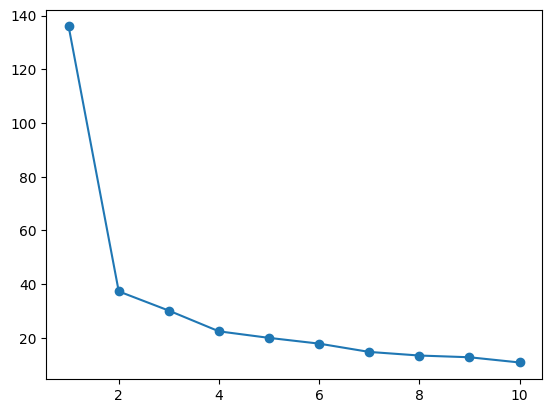

In [228]:
# finding the optimal number of clusters using the elbow method
sse = []
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,random_state=42)
    kmeans.fit_predict(ds_scaled)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse,marker='o')
plt.show()

In [229]:
# performing KMeans clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=0)
ds_scaled['Cluster'] = kmeans.fit_predict(ds_scaled)


In [230]:
#Creating a pipeline
pipeline = Pipeline([('scaler',MinMaxScaler()),('kmeans',KMeans(n_clusters=7,random_state=0))])
ds_scaled['Cluster'] = pipeline.fit_predict(ds_scaled)


In [231]:
# saving the model
with open('final.pkl','wb') as f:
    pickle.dump(pipeline,f)
    
print('Model Saved')

Model Saved


In [232]:
# using Isolation Forsst to detect outliers and removing them
iso = IsolationForest(contamination=0.1)
ds_scaled['Outliers'] = iso.fit_predict(ds_scaled)

outlier_index = np.where(ds_scaled['Outliers']==-1)
cleaned_data = ds_scaled.drop(outlier_index[0])


In [233]:
cleaned_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster,Outliers
1,0.057692,0.000000,0.816327,0.0,1.0,2,1
3,0.096154,0.008197,0.775510,1.0,0.0,5,1
4,0.250000,0.016393,0.397959,1.0,0.0,5,1
5,0.076923,0.016393,0.765306,1.0,0.0,5,1
7,0.096154,0.024590,0.948980,1.0,0.0,5,1


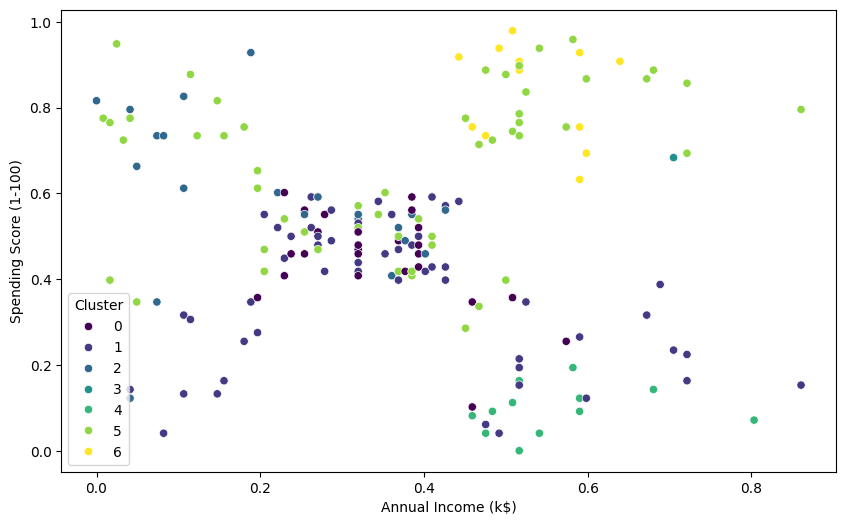

In [234]:
# plotting clusters
plt.figure(figsize=(10,6))
sns.scatterplot(cleaned_data, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.show()

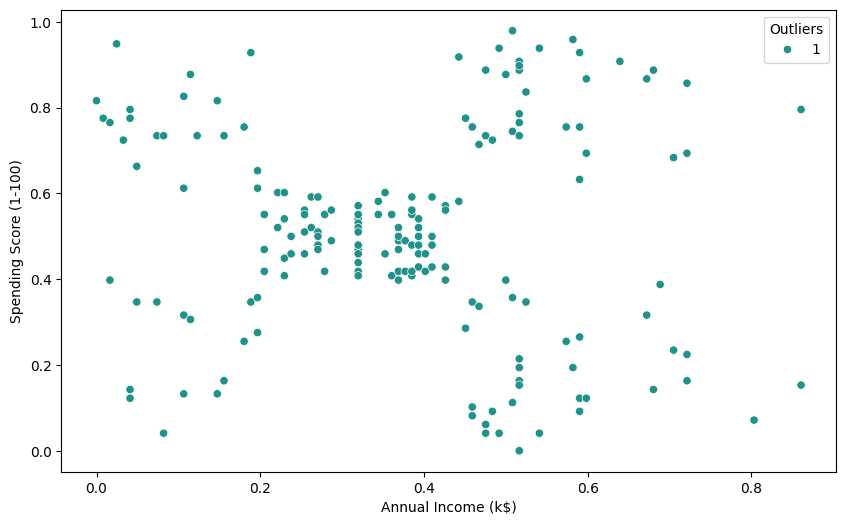

In [235]:
# plotting Outliers
plt.figure(figsize=(10,6))
sns.scatterplot(cleaned_data, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue='Outliers', palette='viridis')
plt.show()

In [237]:
# creating a summary of the clusters
cluster_summary = cleaned_data.groupby('Cluster').mean()
print(cluster_summary)

              Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
Cluster                                                                        
0        0.742308            0.345574                0.449796            0.0   
1        0.597263            0.369325                0.361852            1.0   
2        0.148601            0.215350                0.590909            0.0   
3        0.192308            0.704918                0.683673            0.0   
4        0.306213            0.558638                0.088697            0.0   
5        0.190883            0.362477                0.660053            1.0   
6        0.303254            0.529004                0.830455            0.0   

         Gender_Male  Outliers  
Cluster                         
0                1.0       1.0  
1                0.0       1.0  
2                1.0       1.0  
3                1.0       1.0  
4                1.0       1.0  
5                0.0       1.0  
6              

## **Analysis**

### Cluster 0:
- Old aged Males with moderate annual income whos spending is moderate.
#### Strategy for Cluster 0:
- Providing more variety products considering age in mid-range, offers/discounts would be a good strategy.

### Cluster 1:
- Old aged Females with moderate annual income whos spending is low.
#### Strategy for Cluster 1:
- Providing discounts/Special offers would be a good Strategy.

### Cluster 2:
- Young aged Males with very less income whos spending is moderate.
#### Strategy for Cluster 2:
- Providing them budget friendly options would be a good strategy.

### Cluster 3:
- Young anged Males with high annual income whos spending is high.
#### Strategy for Cluster 3:
- Providing them Luxury products, Brand Collaborations, limited editions would be a good Strategy.

### Cluster 4:
- Middle aged Males with high annual income whos spending is very low.
#### Strategy for Cluster 4:
- Providing them with discounts, Awareness Campaigns would be a good strategy.

### Cluster 5:
- Young aged Males with moderate annual income whos spending is High.
#### Strategy for Cluster 5:
- Providing them with different payment options, Affordable luxury iteams would be a good strategy.

### Cluster 6:
- Middle aged Males with high annual income whos spending is very high.
#### Strategy for CLuster 6:
- Providing them Luxury products, Brand Collaborations, limited editions would be a good Strategy.